In [13]:
# conventional way to import pandas
import pandas as pd
# conventional way to import seaborn
import seaborn as sns
# conventional way to import numpy
import numpy as np

from sklearn import metrics
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/MASS/Boston.csv", index_col=0)

# create a Python list of feature names
feature_cols = ['lstat','age']

# use the list to select a subset of the original DataFrame
X = data[feature_cols].values

# select a Series from the DataFrame
y = data['medv'].values


Viewing the data in seaborn to get a sense of it
        - MEDV     Median value of owner-occupied homes in $1000's
        - LSTAT    lower status of the population
        - AGE      proportion of owner-occupied units built prior to 1940

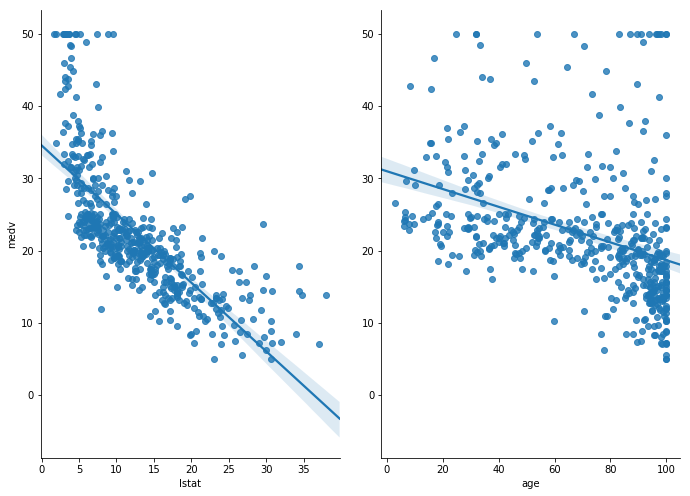

In [14]:
# visualize the relationship between the features and the response using scatterplots
#sns.pairplot(data, x_vars=['lstat','age'], y_vars='medv', size=7, aspect=0.7, kind='reg')
sns.pairplot(data, x_vars=['lstat','age'], y_vars='medv', size=7, aspect=0.7, kind='reg')
plt.show()

In [16]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X, y)

# print the intercept and coefficients
print('intercept: \n', linreg.intercept_)

# The coefficients
print('Coefficients: \n', # pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_)))

# make predictions on the testing set
y_pred = linreg.predict(X)

# calculate RMSE using scikit-learn
np.sqrt(metrics.mean_squared_error(y, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y, y_pred))



intercept: 
 33.2227605318
Coefficients: 
 [('lstat', -1.0320685641826011), ('age', 0.034544338571646058)]
Variance score: 0.55
